## Warm up

**Story one:**

- A medical company is working on a new drug that is supossed to replace an old one
- They recently discovered a new potential solution and they want to test if it works better
- They don't know how to proceed so they asked you as a data analyst to help them
- Firstly, you decide how to measure the performance of the drugs and you propose a metric to measure it. What metric could it be?
- Then, you come up with an idea on how to assess which drug is better - present your strategy!


**Story two:**

- Spicy Shelter is an animal shelter organizes open house events because they want to promote adoption, they need more donations and volunteers.
- In addition to their fb and insta account, they announce these events to thousands of supporters by their monthly info-email to in. 
- A few of the shelter's volunteers suggested to purchase an newsletter automatization account and design newsletters with cute animal photos and “I want to participate” button to replace . 
- The email automatization is not cheap but it gives 3 months free.
- As a volunteer of the shelter you want to help to decide if this purchase will bring sth.
- You decide how to measure the performance of two different options and you come up with an idea.




## Hypothesis Testing 

Hypothesis testing is a group of statistical inference tests used to decide whether the data at hand sufficiently support a particular hypothesis. When we conduct A/B tests our objective is to decide, based on samples taken from two different groups (i.e. populations), whether the two groups are different or not. Hypothesis testing usually consist of these elements:

### Hypotheses

In hypothesis testing, we have two opposing theories about our data, called **hypotheses**. These hypotheses are:

- Null Hypothesis $ H_{0} $: two metrics representing given two groups are equal. For example, the mean CTRs (click through rates) of the two ads A and B are equal, i.e. they do not perform differently
- Alternative Hypothesis $ H_{1} $: two metrics of the two groups are unequal. For example, the mean CTR of ad B is higher than the mean CTR of ad A, i.e. ad B is performing better

#### P-value

**P-value** is the probability of an observed result assuming that the null hypothesis is true. P-value will be checked against a chosen threshold to ensure the significance of our A/B test. We usually choose p-value thresholds $\alpha$ of 10%, 5%, 1% for our hypothesis testing, whereas the most popular one is 5%. In short words, we want to have p-value as low as possible in order to reject the null hypothesis.

### Calculation of the p-value and concluding your test

The conclusion we make depends on the chosen parameters and the resulting p-value:

1. if p-value >= $\alpha$, then we **fail to reject** $ H_{0} $ and conclude that there is no difference between the metrics
2. if p-value < $\alpha$, then we **reject** $ H_{0} $ and conclude that the groups are indeed different. A very small p-value means that such an extreme observed outcome would be unlikely under the null hypothesis

## Exercise: Parameters changes in a statistical test

- How is the **p-value** in a t-test affected by (*hint*: use this [online calculator](https://www.medcalc.org/calc/comparison_of_means.php) to help you)
  1. the difference between the means of the two groups
  2. the variance (or the standard deviation) of the two samples
  3. the size of the samples

## Example - Comparing Penguins 🐧 

Let's discover if there are significant differences in measures defining penguins (flipper_length and bill_length)

In [1]:
# import needed packages

import pandas as pd
import scipy.stats as sps
import seaborn as sns

# scipy.stats contains:
# - a large number of probability distributions,
# - summary and frequency statistics, 
# - correlation functions and statistical tests and more 

In [3]:
# read penguins dataset

penguins = sns.load_dataset(name='penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='species', ylabel='body_mass_g'>

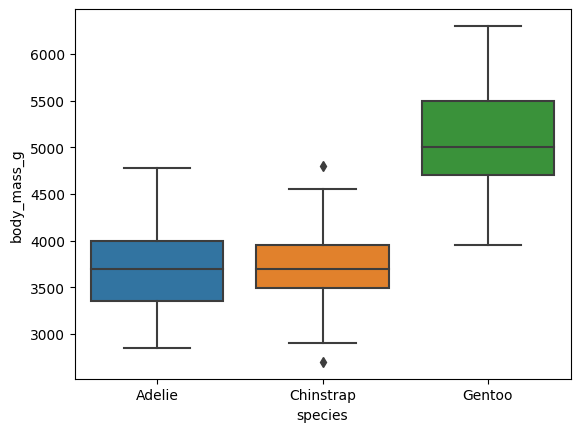

In [4]:
# Visually explore the data 
# Create a boxplot

sns.boxplot(data=penguins, x='species', y='body_mass_g')

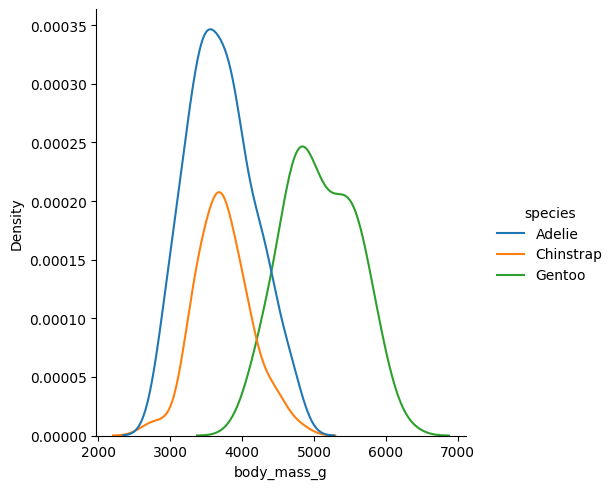

In [5]:
# Create a distplot

sns.displot(data=penguins, x='body_mass_g', hue='species', kind='kde');


In [6]:
# create 3 datasets - each of them representing one of the species
chinstraps = penguins[penguins['species'] == 'Chinstrap']
adelies = penguins[penguins['species'] == 'Adelie']
gentoos = penguins[penguins['species'] == 'Gentoo']

### 1- Adelies vs Chinstraps

In [7]:
# With the help of scipy.stats perform a t test checking if there is a significant difference between the penguins


sps.ttest_ind(adelies['body_mass_g'],chinstraps['body_mass_g'], nan_policy='omit', equal_var=False)

# nan_policy='omit' Do not generate a warning if the input contains nan!
# equal_var = “True”: The standard independent two sample t-test will be conducted by taking into consideration 
# the equal population variances. 
#equal_var = “False”: The Welch's t-test will be conducted by not taking into consideration the equal population variances


Ttest_indResult(statistic=-0.5430902472363278, pvalue=0.5878608159584937)

#### here since our pvalue is greater than Alpha 5% we FAIL TO REJECT that the body mass are the same

### 2- Gentoos vs Chinstraps

In [8]:
# here since our pvalue is less than Alpha 5% we REJECT that the body mass are the same

sps.ttest_ind(gentoos['body_mass_g'],chinstraps['body_mass_g'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=20.627794010997135, pvalue=3.4139631460261665e-48)

### 3- Gentoos vs Adelies

In [9]:
# here since our pvalue is less than Alpha 5% we REJECT that the body mass are the same

sps.ttest_ind(gentoos['body_mass_g'],adelies['body_mass_g'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=23.38602766996551, pvalue=7.709823145147335e-65)

In [ ]:
#Let's check the means

In [10]:
gentoos['body_mass_g'].mean()

5076.016260162602

In [11]:
chinstraps['body_mass_g'].mean()

3733.0882352941176

In [12]:
adelies['body_mass_g'].mean()

3700.662251655629